In [1]:
"""Import the modules required"""
import pandas as pd
import numpy as np
from numpy import linalg as LA
from numpy import asarray
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn import preprocessing
from sklearn.decomposition import PCA
import numpy as np 
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import metrics 

In [2]:
# 1. (a)Using Pandas to load in training csv file and the test set
import pandas as pd
training_set = pd.read_csv('/Users/suzie/Desktop/MSc_DSA_2020/GitHub_Projects/CS5811_Distributed Data Analysis_GroupProject/CS5811_DistributedDataAnalysis_GroupProject/training_set.txt')
test_set = pd.read_csv('/Users/suzie/Desktop/MSc_DSA_2020/GitHub_Projects/CS5811_Distributed Data Analysis_GroupProject/CS5811_DistributedDataAnalysis_GroupProject/test_set.txt')

In [3]:
# View the training set
training_set.head()


,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,AvgTemp,Prcp,Traffic_warning
0,-0.142588,-0.156523,-0.15642,-0.162284,-0.169156,-0.17344,-0.498745,-0.385354,-0.450005,-0.5071,...,0.540457,-0.766212,-1.268771,0.415304,-0.827913,-0.298251,-0.699511,-0.183527,-0.270511,Green
1,-0.142588,-0.156553,-0.15642,-0.162284,-0.169156,-0.17344,-0.498745,-0.385513,-0.450005,-0.5071,...,0.540457,-0.766212,-1.268771,0.415304,-0.827913,-0.298251,-0.699511,-0.114628,-0.270511,Green
2,-0.142588,-0.156553,-0.15642,-0.162284,-0.169156,-0.17344,-0.498745,-0.385513,-0.450005,-0.5071,...,0.540457,-0.766212,-1.268771,0.415304,-0.827913,-0.298251,-0.699511,0.028552,-0.270511,Green
3,-0.142588,-0.156553,-0.15642,-0.162284,-0.169156,-0.17344,-0.498745,-0.385513,-0.450005,-0.5071,...,0.540457,-0.766212,-1.268771,0.415304,-0.827913,-0.298251,-0.699511,-0.419291,-0.187269,Green
4,-0.142588,-0.156553,-0.15642,-0.162284,-0.169156,-0.17344,-0.498745,-0.385513,-0.450005,-0.5071,...,0.540457,-0.766212,-1.268771,0.415304,-0.827913,-0.298251,-0.699511,-0.730413,0.278888,Green


In [4]:
#Check that we do have 47,250 observations and 57 variables as expected
print(training_set.shape)

(47250, 57)


In [5]:
# View the test set
test_set.head()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,AvgTemp,Prcp,Traffic_warning
0,-0.138868,-0.159530,-0.161696,-0.159699,-0.169034,-0.173277,-0.503556,-0.369490,-0.449650,-0.507748,...,0.540855,-0.766362,-1.269091,0.415646,-0.827449,-0.298042,-0.698805,-0.457533,-0.288577,Green
1,-0.138867,-0.159530,-0.161687,-0.159699,-0.169034,-0.173277,-0.503550,-0.369490,-0.449599,-0.507748,...,0.540855,-0.766362,-1.269091,0.415646,-0.827449,-0.298042,-0.698805,-0.749609,-0.288577,Green
2,-0.138867,-0.159530,-0.161687,-0.159699,-0.169034,-0.173277,-0.503550,-0.369490,-0.449599,-0.507748,...,0.540855,-0.766362,-1.269091,0.415646,-0.827449,-0.298042,-0.698805,-0.615629,-0.288577,Green
3,-0.138866,-0.159466,-0.161673,-0.159699,-0.169034,-0.173277,-0.503544,-0.369194,-0.449520,-0.507748,...,0.540855,-0.766362,-1.269091,0.415646,-0.827449,-0.298042,-0.698805,-0.646176,-0.288577,Green
4,-0.138865,-0.159498,-0.161659,-0.159699,-0.169034,-0.173277,-0.503532,-0.369339,-0.449441,-0.507748,...,0.540855,-0.766362,-1.269091,0.415646,-0.827449,-0.298042,-0.698805,-0.529346,-0.288577,Green


In [6]:
#Check that we do have 20125 observations 
print(test_set.shape)

(20125, 57)


In [7]:
#Look at headers for both the training and test dataset to ensure 
#we have 57 dimensions and 1 target value which is categorical
print(training_set.columns)
print(test_set.columns)

Index(['total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths',
       'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hundred',
       'people_vaccinated_per_hundred', 'people_fully_vaccin

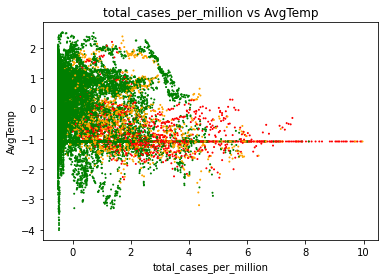

In [12]:
#Scatter Plot of two features of the training set against each other
training_set.plot.scatter(x = 'total_cases_per_million', y = 'AvgTemp', s = 1, c = 'Traffic_warning')
plt.xlabel('total_cases_per_million')
plt.ylabel('AvgTemp')
plt.title('total_cases_per_million vs AvgTemp')
plt.show()

In [14]:
# Normalise training and test dataset
# transform the test set using training set parameters (mean, sd)

# create new dataframe without the target variables
X = training_set.iloc[:, :-1]
Y = test_set.iloc[:, :-1]
print(X)
scaler = preprocessing.StandardScaler().fit(X)
scaled_X = scaler.transform(X)
scaled_Y = scaler.transform(Y)
print(scaled_X.mean(axis=0))
print(scaled_X.std(axis=0)) 


       total_cases  new_cases  new_cases_smoothed  total_deaths  new_deaths  \
0        -0.142588  -0.156523           -0.156420     -0.162284   -0.169156   
1        -0.142588  -0.156553           -0.156420     -0.162284   -0.169156   
2        -0.142588  -0.156553           -0.156420     -0.162284   -0.169156   
3        -0.142588  -0.156553           -0.156420     -0.162284   -0.169156   
4        -0.142588  -0.156553           -0.156420     -0.162284   -0.169156   
...            ...        ...                 ...           ...         ...   
47245    -0.133874  -0.151974           -0.149101     -0.148497   -0.146890   
47246    -0.133821  -0.150234           -0.149697     -0.148291   -0.140953   
47247    -0.133780  -0.151669           -0.150340     -0.148128   -0.146890   
47248    -0.133696  -0.153317           -0.151526     -0.147737   -0.149859   
47249    -0.133643  -0.156553           -0.153365     -0.147465   -0.169156   

       new_deaths_smoothed  total_cases_per_million

In [15]:
# Perform a PCA analysis on the scaled training set 

pca = PCA()
proj_X = pca.fit_transform(scaled_X)
print('Variance ratio captured by each PC is shown as follows: \n', np.round(pca.explained_variance_ratio_, 2))

Variance ratio captured by each PC is shown as follows: 
 [0.16 0.14 0.07 0.06 0.06 0.05 0.04 0.04 0.03 0.03 0.02 0.02 0.02 0.02
 0.02 0.02 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]


Text(0.5, 1.0, 'Scree plot')

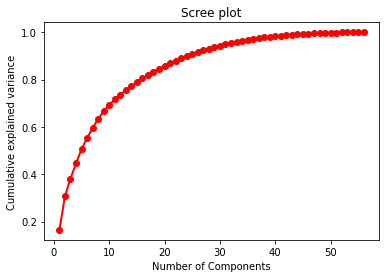

In [17]:
# scree plot to report variance captured by each variable
index = np.arange(56) + 1
plt.plot(index, np.cumsum(pca.explained_variance_ratio_), 'ro-', linewidth=2)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative explained variance');
plt.title('Scree plot')

In [18]:
# projections of the test set by projecting the scaled test data on the same PCA space 
# produced by the training set previously

proj_Y = pca.fit_transform(scaled_Y)
print('Variance ratio captured by each PC is shown as follows: \n', np.round(pca.explained_variance_ratio_, 2))

Variance ratio captured by each PC is shown as follows: 
 [0.17 0.15 0.08 0.06 0.06 0.04 0.04 0.04 0.03 0.03 0.02 0.02 0.02 0.02
 0.02 0.02 0.02 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]


In [19]:
# Divide the training dataset into a smaller training set (II) and a validation set using
# the train test split function and report the number of points in each set.
# we will use the 80/20 rule making test set 20%
from sklearn.model_selection import train_test_split
y = training_set.Traffic_warning
SXtrain, Xvalid, Sytrain, vtest = train_test_split(training_set.iloc[:, :-1], y, test_size = 0.3, random_state=4)
print(SXtrain.shape, Sytrain.shape)
print(Xvalid.shape, vtest.shape)

(33075, 56) (33075,)
(14175, 56) (14175,)


In [20]:
# Normalise both the training set (II) and the validation set 
# (with the parameters from the training set (II) only)
scaler = preprocessing.StandardScaler().fit(SXtrain)
scaled_SXtrain = scaler.transform(SXtrain)
scaled_Xvalid = scaler.transform(Xvalid)

print(scaled_SXtrain.mean(axis=0))
print(scaled_Xvalid.std(axis=0)) 

[-1.07413868e-19  1.19229393e-17 -2.36310509e-18  8.16345396e-18
 -4.29655471e-19 -2.36310509e-18 -5.42440033e-18  7.26386281e-18
 -1.18155255e-18  2.95388137e-18  6.01517660e-18 -1.06339729e-17
 -7.30414301e-18  2.54570867e-17  1.62194940e-17 -2.40607064e-17
 -8.59310943e-19 -1.82603575e-18 -2.48663104e-17  1.90122546e-17
 -4.86047752e-18 -4.94103792e-18  1.08488007e-17 -1.20303532e-17
  5.37069339e-20  8.16345396e-18  8.05604009e-18  3.69503705e-17
 -6.44483207e-19  2.12679458e-17  2.28791538e-17 -4.86047752e-18
  1.26211295e-18  2.56719144e-17  2.09457042e-17  1.86900130e-17
  1.61120802e-18 -2.82229938e-17  2.60478630e-17  3.97431311e-18
  1.00969036e-17 -5.69293500e-18  2.09457042e-17 -9.23759263e-18
  2.55645005e-17  2.93776929e-17 -5.31698646e-18  7.94862622e-18
  5.37069339e-19  9.96263624e-18  2.28254469e-17 -2.63701046e-17
 -5.15586566e-18 -3.40501961e-17  5.04308110e-17  2.78470452e-17]
[0.86922558 0.93917448 0.94135589 0.88885242 0.94382425 0.93221682
 1.0234935  0.93938622

In [30]:
# Choosing the most suitable parameters

# Fit a support vector machine by using Scikit-Learn’s support vector classifier to train an SVM model on the data

from sklearn.svm import SVC # "Support vector classifier"
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import plot_confusion_matrix, accuracy_score
from sklearn.datasets import make_gaussian_quantiles
from mpl_toolkits.mplot3d import Axes3D

model = SVC(kernel='rbf', C=50, gamma = 10, random_state=42)
svm = model.fit(SXtrain, Sytrain)

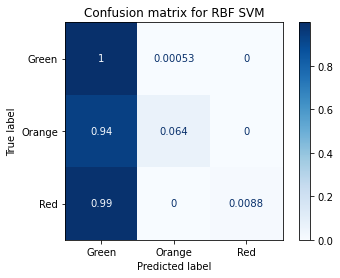

In [31]:
# Evaluate by means of a confusion matrix
matrix = plot_confusion_matrix(svm, Xvalid, vtest,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion matrix for RBF SVM')
plt.show(matrix)
plt.show()

In [32]:
# Generate predictions
y_pred = svm.predict(Xvalid)

In [25]:
# Evaluate by means of accuracy
from sklearn import metrics
accuracy = metrics.accuracy_score(vtest, y_pred)
print(f'Model accuracy: {accuracy}')

from sklearn.metrics import classification_report
print(classification_report(vtest, y_pred))

Model accuracy: 0.9356613756613756
              precision    recall  f1-score   support

       Green       0.94      1.00      0.97     13228
      Orange       0.85      0.06      0.12       607
         Red       1.00      0.01      0.02       340

    accuracy                           0.94     14175
   macro avg       0.93      0.36      0.37     14175
weighted avg       0.93      0.94      0.91     14175



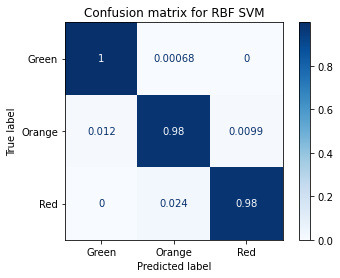

Model2 accuracy: 0.9978835978835979
              precision    recall  f1-score   support

       Green       1.00      1.00      1.00     13228
      Orange       0.97      0.98      0.98       607
         Red       0.98      0.98      0.98       340

    accuracy                           1.00     14175
   macro avg       0.98      0.98      0.98     14175
weighted avg       1.00      1.00      1.00     14175



In [26]:
model2 = SVC(kernel='linear', C=1, gamma = 4, random_state=42)
svm = model2.fit(SXtrain, Sytrain)

# Evaluate by means of a confusion matrix
matrix = plot_confusion_matrix(svm, Xvalid, vtest,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion matrix for linear SVM')
plt.show(matrix)
plt.show()

# Generate predictions
y_pred = svm.predict(Xvalid)

# Evaluate by means of accuracy
accuracy = accuracy_score(vtest, y_pred)
print(f'Model2 accuracy: {accuracy}')
print(classification_report(vtest, y_pred))